In [1]:
import pandas as pd 
import matplotlib.pyplot as plt 
import numpy as np 
#Last downloaded on september 10th
terrorism = pd.read_excel("../Databases/Global Terrorism Database/globalterrorismdb_0919dist.xlsx")
terrorism = pd.DataFrame(terrorism)

In [2]:
#From the table only get the following columns
data = terrorism[[ 'iyear',
 'imonth',
 'iday',
 'approxdate',
 'extended',
 'resolution',
 'country',
 'country_txt',
 'region',
 'region_txt','targtype1',
 'targtype1_txt',
 'targsubtype1',
 'targsubtype1_txt',
  'doubtterr',
 'alternative',
 'alternative_txt',
 'multiple',
 'success',
  'latitude',
 'longitude', 
  'motive']]

len(terrorism)

191464

In [3]:
#Congo appears as Republic of the Congo,  Democratic Republic of the Congo appears also as People's Republic of the Congo,  Russia appears also as Soviet Union, Yemen also as North Yemen, and Vietnam appears also as South Vietnam

#There´s no data for Mongolia and Oman

#List of countries of interest as appears in the Data Base
netos = ['Albania','Algeria','Angola','Argentina','Azerbaijan','Benin','Bolivia','Brazil','Brunei','Cameroon','Canada','China','Colombia','Republic of the Congo','Democratic Republic of the Congo', "People's Republic of the Congo" ,'Denmark','Ecuador','Egypt','Estonia','Gabon','Georgia','Ghana','Guatemala','Indonesia','Iran','Iraq','Kazakhstan','Kuwait','Kyrgyzstan','Libya','Malaysia','Mexico','Mongolia','Myanmar','Nigeria','Norway','Oman','Qatar','Russia', 'Soviet Union','Saudi Arabia','South Sudan','Sudan','Trinidad and Tobago','Tunisia','Turkmenistan','United Arab Emirates','United Kingdom','Venezuela','Vietnam','Yemen' , 'North Yemen']

# #Listo of available countries in the Data Base
# available = targets["country_txt"].unique().tolist()

# #Check which countries of our interest does not appear in de DB
# for x in netos:
#     if x not in available:
#         print(x)

In [4]:
#Get only the data for countries we are interested in
targets = data.loc[data["country_txt"].isin(netos)]

In [5]:
#Get only the incidentes related to petroleoum 
# (check de code book ) 59 = Oil Tanker, 108 = Oil, 1 = Gas/Oil/Electric
oil = targets.loc[(targets["targsubtype1"] == 59) | (targets["targsubtype1"] == 108) | (targets["targsubtype1"] == 1)]
len(oil)

1605

In [7]:
#As we are just interested in month, we will create a fake date for those rows where the day is missing and represented with value 0
oil["iday"] = oil["iday"].replace({ 0 : 1})

#Create a column with datetime format to work with and create a month year column 
oil["period"] = pd.to_datetime(oil.iyear.astype(str) + "/" + oil.imonth.astype(str) + "/" + oil.iday.astype(str)).dt.to_period("M") 

In [8]:
#Group rows by period and count
period = oil.groupby("period")
period = period["period"].count()

#Group rows by year and count 
year = oil.groupby("iyear")
year = year["iyear"].count()

In [10]:
writer = pd.ExcelWriter("../Excel_reports/Terrorismo.xlsx")
oil.to_excel(writer, sheet_name='Comple_DB')
year.to_excel(writer, sheet_name='Yearly_count')
period.to_excel(writer, sheet_name='Monthly_count')
writer.save()

# Graph how many terrorisms in a month

In [13]:
#Group rows by period
period = oil.groupby("period")
#Count events in 
period = period["period"].count()
period.tail()

period
2018-08    4
2018-09    8
2018-10    6
2018-11    9
2018-12    5
Freq: M, Name: period, dtype: int64

In [16]:
#just succesful attacks
succesful = oil.loc[oil["success"] == 1]
#Count times in a period of succesful attacks
times = succesful.groupby("period")
times = times["period"].count() 
times.tail()


period
2018-08    3
2018-09    6
2018-10    6
2018-11    9
2018-12    4
Freq: M, Name: period, dtype: int64

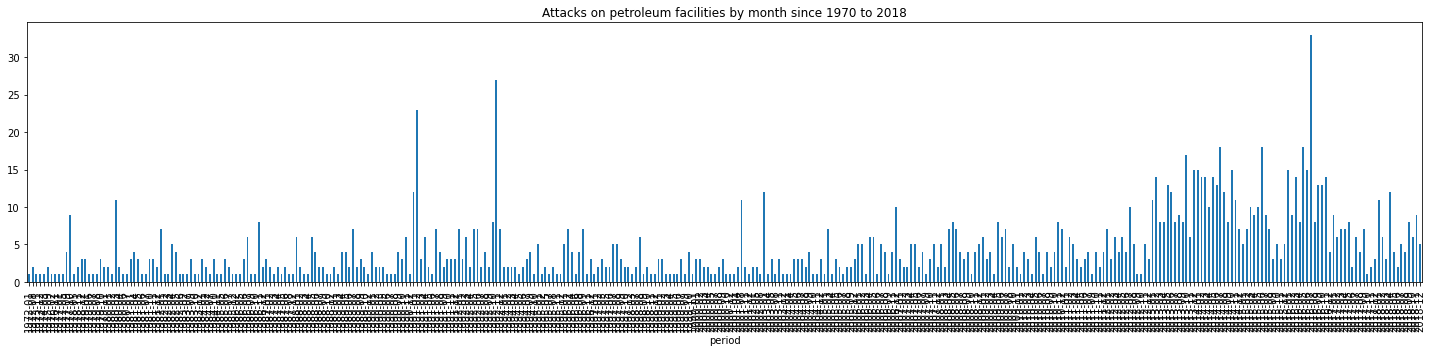

In [35]:
period.plot(kind='bar', figsize=(20,5))
x_axis = np.arange(0, len(period))
tick_locations = []
for x in x_axis:
        tick_locations.append(x)
plt.xticks(tick_locations)
plt.title("Attacks on petroleum facilities by month since 1970 to 2018")
plt.tight_layout()
plt.show()

# By Year


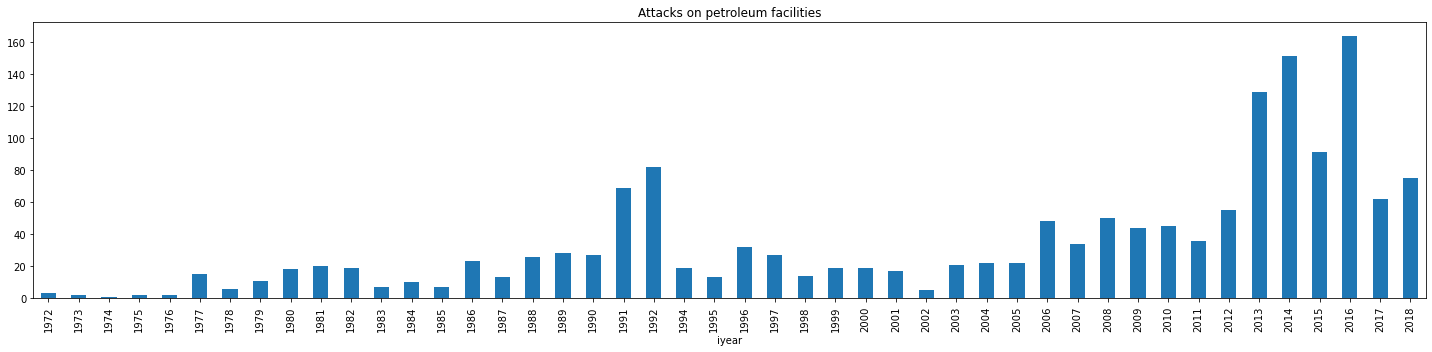

In [34]:
year = oil.groupby("iyear")
year = year["iyear"].count()
year.plot(kind='bar', figsize=(20,5))
plt.title("Attacks on petroleum facilities")
plt.tight_layout()
plt.show()
